In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='dark')
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


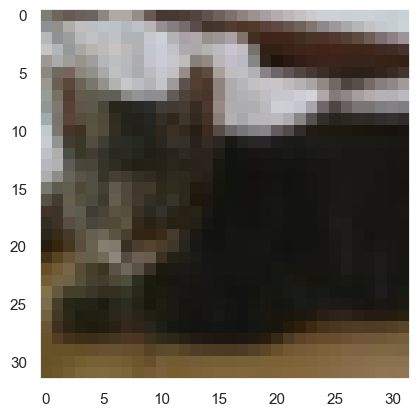

In [2]:
cifar10_dataset = keras.datasets.cifar10.load_data()
(X_train, Y_train), (X_test, Y_test) = cifar10_dataset

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
plt.imshow(X_train[9])

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization - bringin values between 0 to 1
X_train /= 255
X_test /= 255
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [4]:
cnn = keras.Sequential([
keras.layers.Conv2D(32, 8, activation='relu', input_shape=(32, 32, 3)),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(10, activation='softmax')])

In [5]:
cnn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
cnn.fit(X_train, Y_train, epochs=20)

Epoch 1/20


2023-06-01 01:48:41.733680: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 12s 7ms/step - loss: 1.8456 - accuracy: 0.3396
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5149 - accuracy: 0.4635
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4040 - accuracy: 0.5038
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3278 - accuracy: 0.5336
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2667 - accuracy: 0.5559
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2126 - accuracy: 0.5754
Epoch 7/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1649 - accuracy: 0.5928
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1196 - accuracy: 0.6098
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0807 - accuracy: 0.6226
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0379

In [7]:
Y_prob = cnn.predict(X_test)
Y_pred = Y_prob.argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [8]:
act_pred = pd.DataFrame()
act_pred['Actual'] = Y_test
act_pred['Predicted'] = Y_pred
act_pred.head(10)

,Actual,Predicted
0,3,3
1,8,1
2,8,8
3,0,8
4,6,4
5,6,6
6,1,1
7,6,6
8,3,3
9,1,1
